# **EE769: Introduction to Machine Learning**

## Assignment 2: ML for Smart Monkeys

### Assignment Description:
- Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not.
- Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment_behavior). 
- Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). 
- **Requirement:** To develop a pre-processing pipeline and a classifier, and also find out which subset of proteins is important in predicting which class.

In [16]:
# Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import queue

ModuleNotFoundError: No module named 'scikitlearn'

## 1. Data
**Train Data:** https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

**Test Data:** https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv

In [2]:
df_train = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
df_test = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")

In [3]:
df_train

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


### Data Types Present in the Training Data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

From the above we see that there are two categorical variables (Genotype and Treatment_Behavior) of datatype Object and the rest are numeric and continuous of datatype float64. 

As we can see not all columns are numerical. So we assign some integral value to the categorical variables instaed of strings. Therefore, the first step of our data analysis is to replace the strings by integers in the categorical variable columns. To keep track of this encoding, we create a dictionary with entries: Column->(String,index).

In [5]:
try: # If stringencoding is defined, then do nothing.
    stringEncoding
except NameError: # If not defined, then proceed. with no try statement, if we forget and run this cell again, information will be lost.
    # print("This happened.")
    stringEncoding = {}
    for each in df_train.columns.values:
        colData = np.array(df_train[[each]])  # We test each column.
        # print(colData)
        try:
            # If no entry is a string, then this will not raise an error.
            df_train[[each]] = np.array(colData, dtype=np.float64)
        except:
            # Error has been raised.
            # List of all string in data. Sorted for intuitiveness.
            stringList = np.sort(np.unique(colData))
            # print(stringList)
            stringEncoding[each] = [(stringList[i], i) for i in range(
                np.shape(stringList)[0])]  # Loop over all strings
            # print(stringEncoding)
            # print(stringEncoding,colData)
            # So for each value in column, look for its string encoding.
            df_train[[each]] = np.array(
                [np.where(stringList == x)[0] for x in colData], dtype=np.int64)
df_train

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,1,3
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,1,3
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,1,3
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,1,3


## 2a. Are the Variables Usable?

We check if data has missing values. If it does, the data requires cleaning up before use.

In [6]:
# We look at missing values in the training set.
df_isnull = df_train.isnull().sum()         # Sum number of missing values.
df_isnull = df_isnull.loc[(df_isnull!=0)]   # Remove where all values present i.e. sum of null is zero.

df_isnull

ELK_N          15
MEK_N           4
Bcatenin_N     15
BAD_N         180
BCL2_N        195
pCFOS_N        60
H3AcK18_N     150
EGR1_N        180
H3MeK4_N      180
dtype: int64

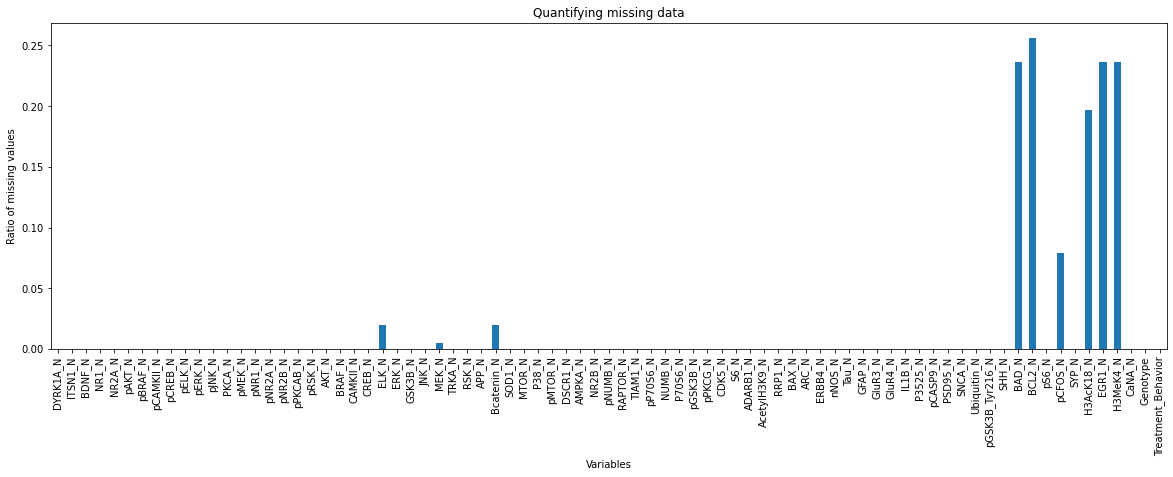

In [7]:
df_train.isnull().mean().plot.bar(figsize=(20,6))
plt.ylabel('Ratio of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

*   We can see that 9 types of proteins have missing values.
*   The maximum number of missing values are for BCL2_N,  approximately 25% of values are missing.
*   For EGR1_N,  BAD_N, H3MeK4_N this is 20% missing.

All variables seem usable at first sight and the irregularities seem to be fixable using imputation.

As we can see, there are no NaNs in the categorical data, so we can impute the training data using iterative imputer as the NaNs are present only in continuous variables. We impute before feature selection, since scikit algorithms are not guaranteed to work with NaN values. Also, there's a penalty associated with Regression based Imputing of Variables, as the imputed variables will show greater corrleation. So we think it will not effect the outcome severly.

## 3. Missing Values Multivariate imputation

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute = IterativeImputer() # Impute Object. No integral NaNs in data.
df_train_final = impute.fit_transform(df_train)

Implemented on the basis of regression based impute algorithm: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer.

We now separate out the input and output variables and normalize the features.

In [9]:
# X corresponds to the input and Y the output.
X = df_train_final[:, :-2]
# We normalize the features so that one feature doesn't "unfairly" dominate any other.
X = (X - X.mean(axis=0, dtype=np.float64))/X.std(axis=0, dtype=np.float64)
Y = np.array(df_train_final[:,-2:], dtype=np.int64) ## To ensure proper type.
print(X, Y)

[[ 0.23974473  0.42848861  2.37245233 ... -1.24701976 -1.4382374
   0.94304603]
 [ 0.27964803  0.21693411  1.97669047 ... -1.17694807 -1.38646627
   1.14476809]
 [ 0.25988768  0.36681455  2.11728651 ... -1.21377478 -1.45155532
   1.68743553]
 ...
 [-0.20194398 -0.15616558 -0.02792479 ... -0.57317495 -0.32577777
   0.22429103]
 [-0.26216375 -0.20834276 -0.46988044 ... -1.05984126  0.07466747
   0.55009802]
 [-0.26222495 -0.10902331 -0.39361442 ... -0.51778685 -0.06248777
   0.48133992]] [[0 0]
 [0 0]
 [0 0]
 ...
 [1 3]
 [1 3]
 [1 3]]


## 2b. Are there Significant Correlation Between Variables 

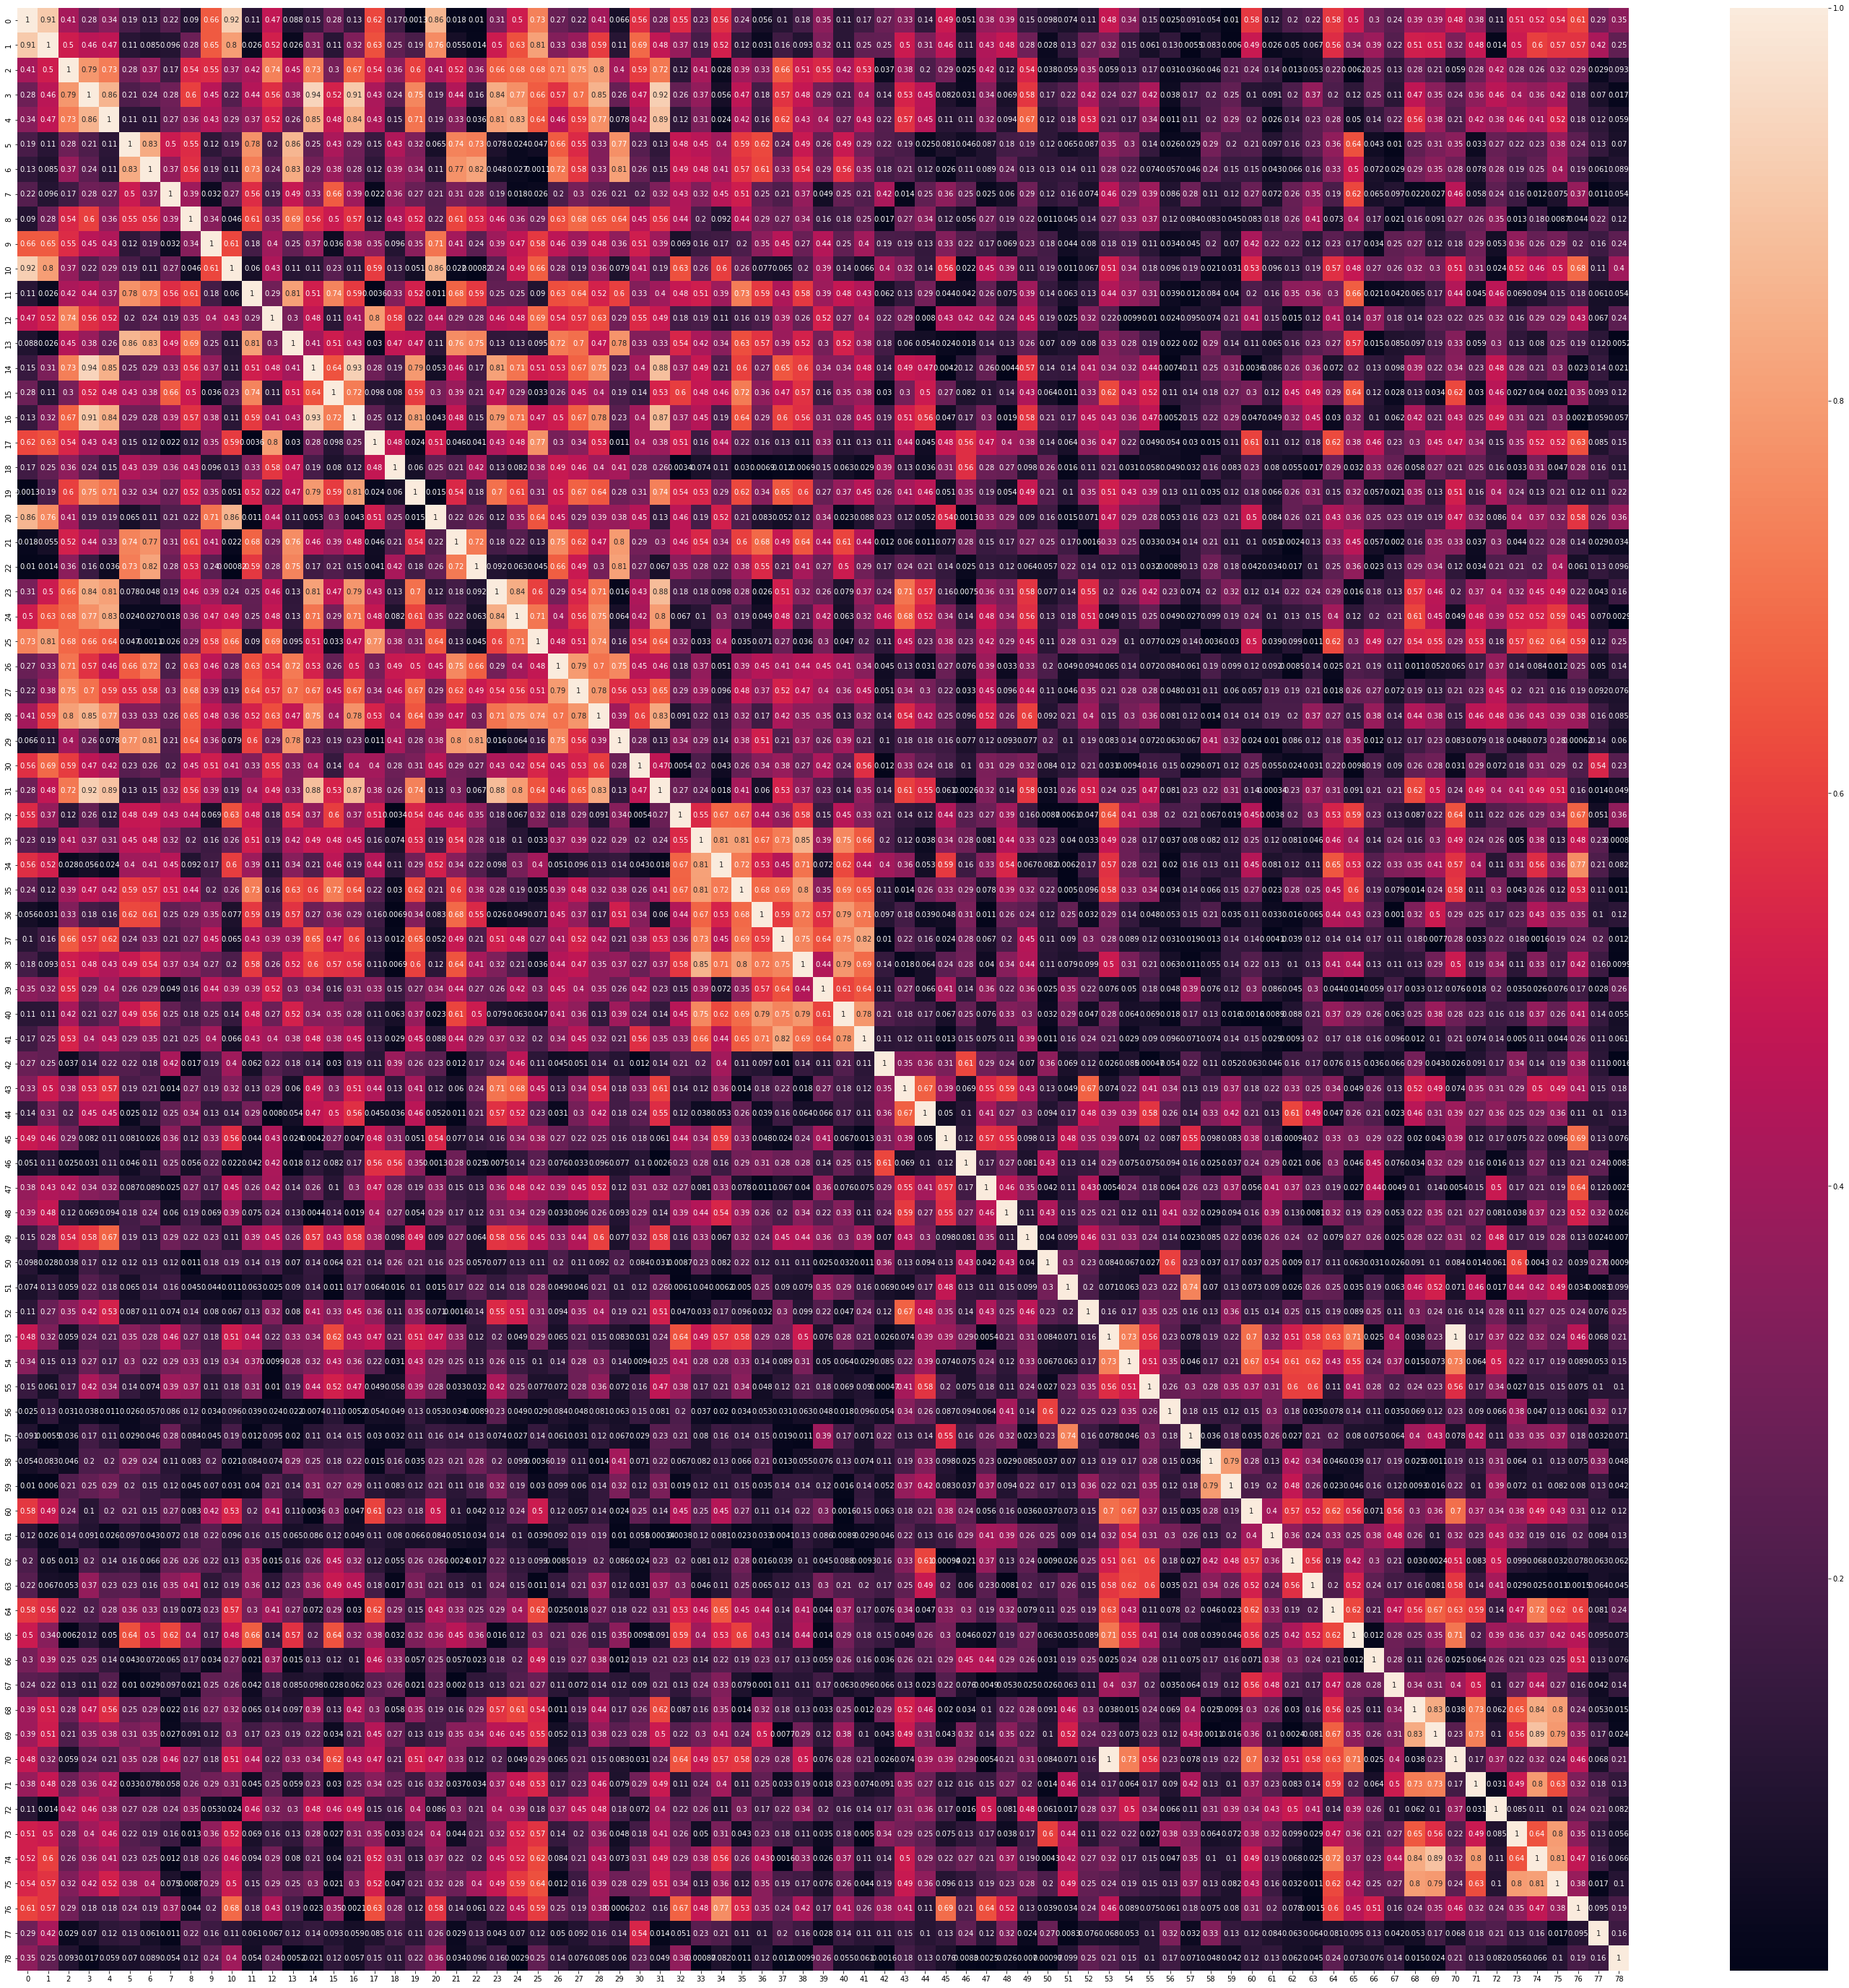

In [10]:
# We observe the correlation heat map
df_train_final = pd.DataFrame(df_train_final)
corrMatrix = df_train_final.corr(method='spearman')# Using spearman for nonlinear
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(abs(corrMatrix), annot=True)
plt.show()

We now find the variables with over are 0.85 correlation.

In [11]:
def corr_df(x, corr_val):
    '''
    Obj: Finds the strongly correlated features.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))

In [12]:
corr_df(df_train_final, 0.85)

10 | 0 | 0.95
10 | 1 | 0.91
13 | 5 | 0.87
14 | 3 | 0.95
14 | 4 | 0.86
16 | 3 | 0.89
16 | 14 | 0.9
20 | 0 | 0.97
20 | 1 | 0.93
20 | 10 | 0.93
31 | 3 | 0.93
31 | 4 | 0.88
31 | 14 | 0.89
31 | 16 | 0.86
70 | 53 | 1.0
73 | 50 | 0.9
74 | 68 | 0.87
74 | 69 | 0.9


On imputation, we filled the NaN values in but from the above heat map, we see that the variables corresponding to the above columns in the correlation matrix are highly correlated in our sample data. We shall select features based on another approach which takes the population into account too.

### Feature Selection and Significance of Correlation
For feature selection, we implement here the Correlation based feature selection method (https://en.wikipedia.org/wiki/Feature_selection) proposed by Mark A. Hall, which can be roughly understood as follows: Our goal in feature selection is to:  
1. We have to choose those features which have maximum correlation with output
2. We have to choose those features which have minimum correlation between themselves

The above method tries to do both by finding an optimal subset which maximises the following(based on https://www.cs.waikato.ac.nz/~mhall/thesis.pdf):
$$\mathrm{CFS} = \max_{S_k}
\left[\frac{r_{c f_1}+r_{c f_2}+\cdots+r_{c f_k}}
{\sqrt{k+2(r_{f_1 f_2}+\cdots+r_{f_i f_j}+ \cdots
+ r_{f_k f_{k-1} })}}\right].$$
Where $r_{c f_{i}}$ is the correlation between the output and feature $i$ and $r_{f_{i} f_{j}}$ is the correlation between features $i$ and $j$. We base our code here on the implementation from https://johfischer.com/2021/08/06/correlation-based-feature-selection-in-python-from-scratch/#:~:text=Including%20feature%20selection%20methods%20as,predictive%20power%20by%20reducing%20noise. It is fairly similar to forward feature selection.


Before we proceed to feature selection, note that since our output is categorical, we need to choose an appropriate choice for correlation function, since pearson and spearman correlations are applicable only for continuous variables(https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365). If the output is binary (that is dichotomous), then we use the Point-biserial correlation coefficient (https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient) to evaluate the feature-output correlation. Otherwise we use the anova-f statistic as a measure of feature-output correlation for output with more than two classes. 

In [13]:
def correlation_categorical_continuous(y, X, y_bool): ### y_bool-> Is y a binary category?
    if y_bool: ### If output is binary
        return scipy.stats.pointbiserialr(y, X)[0]
    else: ### Otherwise
        return sklearn.feature_selection.f_classif(X.reshape(-1,1), y)[0]
def correlation_continuous_continuous(x1, x2, y_bool):
    if y_bool: ### To ensure we are using the same metric in feature-output and feature-feature calculation.
        return scipy.stats.pearsonr(x1, x2)[0]
    else:
        return scipy.stats.f_oneway(x1, x2)[0]
# correlation_categorical_continuous(data_y[:,0],data_x[:,0])

#### Description of Algorithm 
Since, finding the optimal subset directly means trying $2^{n}-1$ permutations, we instead implement here the method suggested by Hall in his thesis: Best First Search Method using a Priority Queue (note that in Python, Priority Queues are sorted in ascending order).

In [17]:
import sklearn.feature_selection

def feature_selection_CFS(X, y, y_bool):###Given input matrix X and target y, it gives the features we must use.
    num_features = np.shape(X)[1]
    ### Feature-Output Correlation.
    fc = np.abs(np.array([correlation_categorical_continuous(y, X[:, i], y_bool) for i in range(num_features)]))
    
    ff = {}
    ### Can be improved so that only necessary correlations are calculated once. 
    
    ### We memoise fc, ff to prevent unncessary overhead.
    
    def merit_cfs(subset):### Given a subset(list of columns), we calculate the CFS merit.
        k = np.shape(subset)[0] ### Cardinality of subset. 
#         print(fc[subset])
        subset_fc = np.sum(fc[subset]) ### Feature-Output Correlation Sum of Subset.
        
        ### We have to calculate correlation of fifj, i>j.
        subset_ff = 0.0 ### Sum of correlations.
        for i in set(subset): ### Features in current subset.
            for j in set(subset): ### Features in current subset.
                if i>j: ### To prevent double counting.
                    if (i,j) not in ff: ### If not in dictionary, then evaluate
                        ff[(i,j)] = correlation_continuous_continuous(X[:,i],X[:,j], y_bool)
                        subset_ff = subset_ff+ff[(i,j)]
                    else: ### If in dictionary, simply fetch value.
                        subset_ff = subset_ff+ff[(i,j)]
                else:
                    pass ### To prevent overcounting.
        return subset_fc/np.sqrt(k+2*subset_ff)
    
    optimal_subset = [np.argmax(fc)] ### Final reported subset. 
#     print(optimal_subset)
    current_subset = [np.argmax(fc)] ### Working subset in algorithm. 
    ### Initialized by feature with maximum correlation.
    
    optimal_subset_found = False
    ### Boolen variable for loop termination. Is optimal subset found??
    
    current_merit = fc[np.argmax(fc)] ### Merit of working subset. 
    prev_merit = fc[np.argmax(fc)] ### Working of the subset with maximum merit in the previous iteration.
    
    total_iter = set(range(num_features)) ### Universal containing all features. 
    current_iter = set(current_subset) ### Features containted in working subset. 
    
    num_backtrack = 0 ### Iterator to keep track of number of "backtracks", or nodes moved.
    max_backtrack = 100 ### Maximum number of backtracks for loop termination. Otherwise too much resources.
    
    pqueue = queue.PriorityQueue() ### Priority Queue
    pqueue.put((-current_merit, current_subset)) 
    ### Since Priority Queues in Python are in ascending order, and we need the subset with maximal merit at
    ### each step, we use a simple trick. x->-x, ascending becomes descending. 
    
    while not(optimal_subset_found) and not(pqueue.empty()): ### loop termination, optimal subset found or
                                                            ### Priority Queue is empty.
#         print(pqueue.empty(), optimal_subset_found)
        current_merit, current_subset = pqueue.get() ### Get the set with maximum merit. 
        current_merit = -current_merit ### Our trick. 
#         print(pqueue.qsize())
        current_iter = set(current_subset) ### All the features in our subset. 
#         print(current_iter)
#         print(current_merit, current_subset, pqueue.qsize())
        
        if prev_merit > current_merit: 
            ### If merit has decreased from previous iteration, then our subset is not optimal.
            num_backtrack=num_backtrack+1
        else:
            prev_merit = current_merit ### Otherwise, subset can be optimal.
            optimal_subset = current_subset
#             print(optimal_subset)
            
        if num_backtrack==max_backtrack: ### Implemented to prevent over resource consumption. 2^n combinations!!
            optimal_subset_found=True ### Loop termination. 
        else:
            for i in total_iter-current_iter: ### Features "not" in the working subset.
                pqueue.put((-merit_cfs(current_subset+[i]), current_subset+[i])) ### Add to queue, 
                                                                                ### which will sort them in O(log n) time.
    return np.sort(np.array(optimal_subset)) ### Optimal subset which has max merit. Sorted for readabililty.
features0 = feature_selection_CFS(X, Y[:, 0], True) ### Features for Genotype Classification.
features1 = feature_selection_CFS(X, Y[:, 1], False) ### Features for Treatment Behaviour Calculation.
print(features0, features1)

[30 33 46 48 56 58 71] [ 7 17 32 34 35 45 53 65 70 76]


We have significant reduction in dimensions as can be seen from above. However, note that according to Hall, this algorithm fails (shows lower performance with feature selection) when interaction between features becomes important in classification/regression. However, given that the above method is extremely fast and independent of the details of the model, it suffices for a rudimentary feature selection approach as a filter method. 

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
import time

''' 
predictors:
X = df[features].to_numpy()
target:
Y = df[label].to_numpy()
'''

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores = cross_val_score(svc, X, Y[:,1], cv=10)
best_score = np.mean( scores )
print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

Score: 85.71% (Time: 0.2832 s)


In [21]:
from sklearn.feature_selection import RFECV

''' 
predictors:
X = df[features].to_numpy()
target:
Y = df[label].to_numpy()
'''

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores = cross_val_score(svc, X[:,features1], Y[:,1], cv=10)
best_score = np.mean( scores )
print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

Score: 77.83% (Time: 0.1976 s)


## 2c. Checking Class Balance

C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genotype', ylabel='count'>

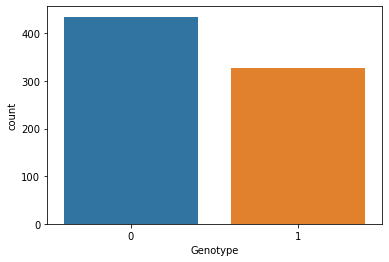

In [28]:
sns.countplot(df_train['Genotype'])

#### Genotype
The class imbalance is about 15%, which indicates that the classes are fairly balanced. Therefore, we will use the ROC AUC score to compare different classifier's performance.

1. https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd
2. https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Treatment_Behavior', ylabel='count'>

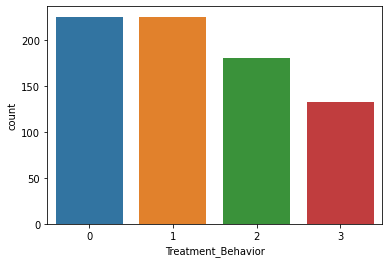

In [23]:
sns.countplot(df_train['Treatment_Behavior'])

 #### Treatment Behaviour
The class imbalance is about 30%, which indicates that there **is** class imbalance. Therefore, we use here weighted F1 score to compare the performance of different classifiers. 
$$F1_{weighted} = \frac{\sum_{i}(N_i \times F1_{class_i})}{\sum_{i}N_i}$$

https://stats.stackexchange.com/questions/463224/which-performance-metrics-for-highly-imbalanced-multiclass-dataset